In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv('train.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data analysis and Preprocessing

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# replace the missing value in age columns with the mean value 
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3192\4139963184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Now we have 2 null values in the Embarked column we will replace those null with the most frequent time accuring character S, Q etc
print(df['Embarked'].mode()[0])

S


In [11]:
# replace with
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3192\2253342688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Now we did not have any need of Name Ticket column 
# and further we will convert Sex and Embarked column into numeric words

In [14]:
df.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}} ,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3192\324797002.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}} ,inplace=True)


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [16]:
df.shape

(891, 12)

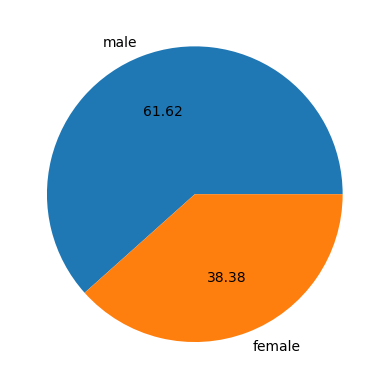

In [17]:
plt.pie(df['Survived'].value_counts(), labels=['male','female'],autopct="%0.2f")
plt.show()

In [18]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [19]:
df['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

# Spliting the Data

In [20]:
X=df.drop(columns=['Name','Ticket','Survived','Cabin'] , axis=1)
y=df['Survived']

In [21]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,3,1,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,0
888,889,3,1,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [23]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,0,45.500000,0,0,28.5000,0
733,734,2,0,23.000000,0,0,13.0000,0
382,383,3,0,32.000000,0,0,7.9250,0
704,705,3,0,26.000000,1,0,7.8542,0
813,814,3,1,6.000000,4,2,31.2750,0
...,...,...,...,...,...,...,...,...
106,107,3,1,21.000000,0,0,7.6500,0
270,271,1,0,29.699118,0,0,31.0000,0
860,861,3,0,41.000000,2,0,14.1083,0
435,436,1,1,14.000000,1,2,120.0000,0


In [54]:
from sklearn.ensemble import RandomForestClassifier


In [25]:
model=LogisticRegression()

In [26]:
model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
X_pred=model.predict(X_train)


In [55]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
from sklearn.naive_bayes import GaussianNB

# accuracy

In [30]:
from sklearn.metrics import accuracy_score

In [33]:
training_accuracy=accuracy_score(y_train, X_pred)

In [34]:
print("Accuracy Score of Training data set is:", training_accuracy)

Accuracy Score of Training data set is: 0.8033707865168539


In [35]:
test_pred= model.predict(X_test)


In [36]:
test_accuracy=accuracy_score(y_test,test_pred)

In [37]:
print("Accuracy Score of Testing data set is:", test_accuracy)

Accuracy Score of Testing data set is: 0.7988826815642458


# Nayive Byes

In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [52]:
GB = GaussianNB()
MB=  MultinomialNB()
BN= BernoulliNB()

In [53]:
GB.fit(X_train, y_train)
MB.fit(X_train, y_train)
BN.fit(X_train, y_train)

# Make predictions
GB_pred = GB.predict(X_test)
MB_pred = MB.predict(X_test)
BN_pred = BN.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, GB_pred)
accuracy2 = accuracy_score(y_test, MB_pred)
accuracy3 = accuracy_score(y_test, BN_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Accuracy: {accuracy3:.2f}")

Accuracy: 0.78
Accuracy: 0.71
Accuracy: 0.78


# by random_forest Regressor


In [56]:
Rand_pred=model_forest.predict(X_test)


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
mse = accuracy_score(y_test, Rand_pred)
# r2 = r2_score(y_test, Rand_pred)
print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")

Mean Squared Error: 0.8156424581005587


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)


In [ ]:
# Predict on the test set
gbr_pred = gbr.predict(X_test)


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

# make prediction on test.csv for Submission

In [ ]:
datafram=pd.read_csv('test.csv')

In [ ]:
datafram

In [ ]:
datafram['Age'].fillna(datafram['Age'].mean(), inplace=True)

In [ ]:
datafram['Embarked'].fillna(datafram['Embarked'].mode()[0], inplace=True)

In [ ]:
datafram.isnull().sum()

In [ ]:
datafram=datafram.drop(columns='Cabin',axis=1)

In [ ]:
datafram['Fare'].fillna(datafram['Fare'].mode()[0], inplace=True)

In [ ]:
datafram.head()

In [ ]:
datafram.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}} ,inplace=True)

In [ ]:
datafram.head()

In [ ]:
testing=datafram.drop(columns=['Name','Ticket'] , axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
testing= sc.fit_transform(testing)

In [ ]:
result=model.predict(testing)

In [ ]:
submit=pd.DataFrame({"PassengerId":datafram['PassengerId'], "Survived":result})

In [ ]:
submit.head()

In [ ]:
submit.to_csv('Submission.csv', index=False)